In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid",rc = {'axes.facecolor': '#FBEAEB'})
pd.options.display.max_columns=50

In [ ]:
df=pd.read_csv("/content/Startups1.csv")
df.sample()

,Unnamed: 0,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
156,156,ReNew Power,Gurgaon,2011,Sumant Sinha,"Clean Energy, Energy, Renewable Energy, Solar,...",ReNew Power is an Indian wind energy company.,101-250,2776179257,12,9


No charts were generated by quickchart
No charts were generated by quickchart


In [ ]:
df.shape

(300, 11)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Company', 'City', 'Starting Year', 'Founders',
       'Industries', 'Description', 'No. of Employees', 'Funding Amount in $',
       'Funding Round', 'No. of Investors'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           300 non-null    int64 
 1   Company              300 non-null    object
 2   City                 300 non-null    object
 3   Starting Year        300 non-null    int64 
 4   Founders             300 non-null    object
 5   Industries           300 non-null    object
 6   Description          300 non-null    object
 7   No. of Employees     300 non-null    object
 8   Funding Amount in $  300 non-null    int64 
 9   Funding Round        300 non-null    int64 
 10  No. of Investors     300 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 25.9+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0             0
Company                0
City                   0
Starting Year          0
Founders               0
Industries             0
Description            0
No. of Employees       0
Funding Amount in $    0
Funding Round          0
No. of Investors       0
dtype: int64

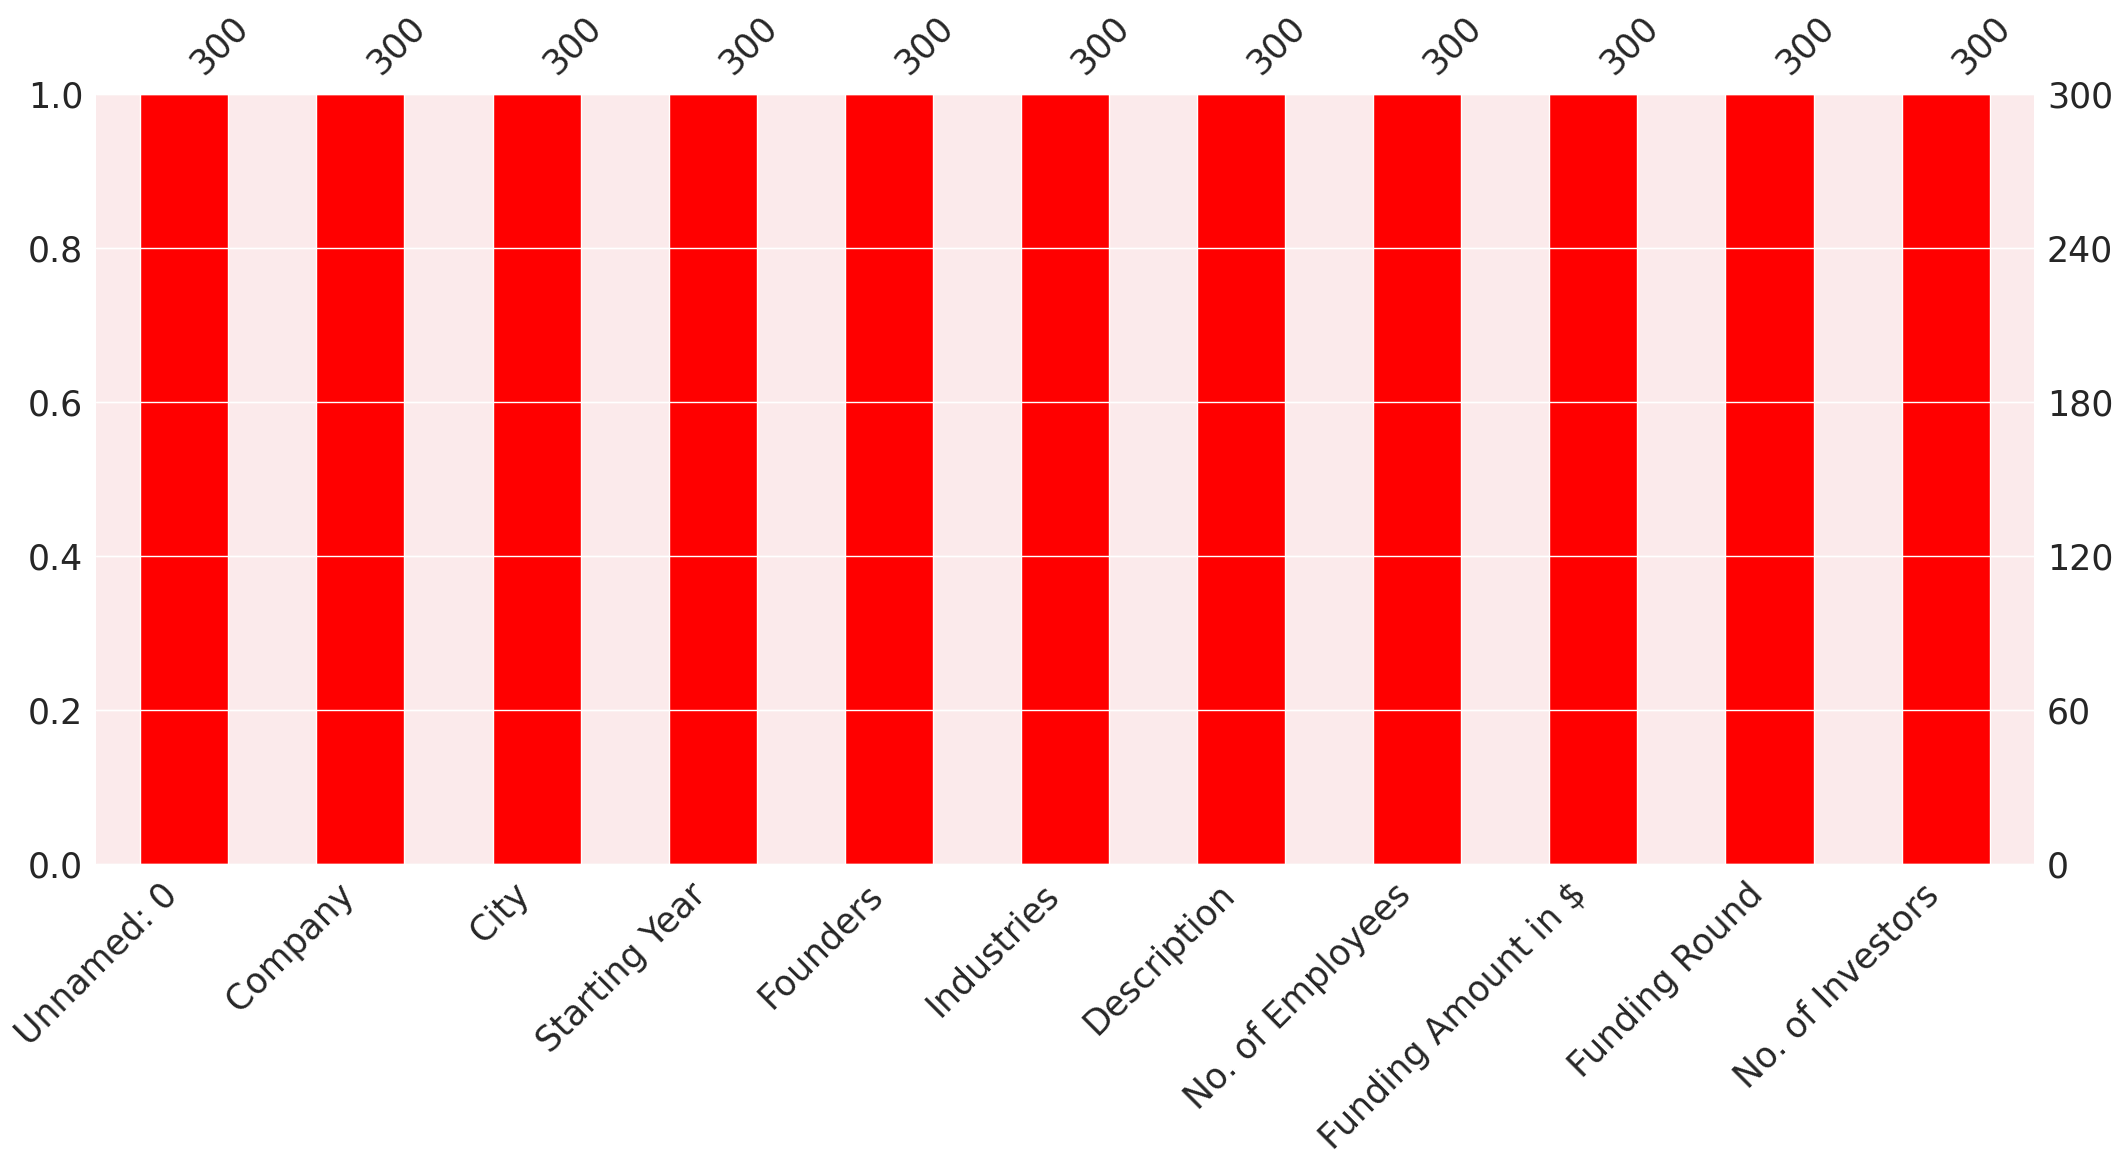

In [ ]:
import missingno as msno
msno.bar(df,color="red",fontsize=25);

In [ ]:
df.duplicated().sum()

0

In [ ]:
for i in df.columns:
    print(i,"----------",df[i].unique(),"--------",df[i].nunique())

Unnamed: 0 ---------- [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300.0,1.495000e+02,8.674676e+01,0.0,74.75,149.5,2.242500e+02,2.990000e+02
Starting Year,300.0,2.013393e+03,5.139390e+00,1984.0,2012.00,2015.0,2.016000e+03,2.020000e+03
Funding Amount in $,300.0,3.148655e+08,1.628802e+09,0.0,14287377.00,41087733.5,1.319438e+08,2.476762e+10
Funding Round,300.0,5.986667e+00,4.239465e+00,0.0,3.00,5.0,7.000000e+00,2.500000e+01
No. of Investors,300.0,1.055000e+01,7.530151e+00,0.0,5.00,9.0,1.400000e+01,4.500000e+01


<ipython-input-13-db93604bff16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


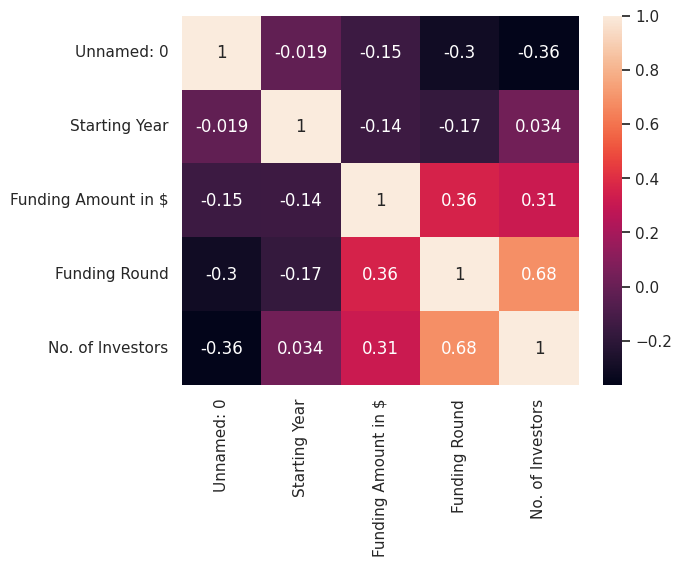

In [ ]:
sns.heatmap(df.corr(),annot=True);

In [ ]:
df.sample()

,Unnamed: 0,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
251,251,RAW Pressery,Mumbai,2014,Anuj Rakyan,"Delivery, Food and Beverage, Food Processing, ...",RAW Pressery is a clean-label beverage company...,101-250,41255467,12,7


In [ ]:
df.drop(columns=["Unnamed: 0","Description"],inplace=True)

In [ ]:
df["Industries_type 1"]=df["Industries"].str.split(",",expand=True)[0]
df["Industries_type 2"]=df["Industries"].str.split(",",expand=True)[1]
df[df["Industries_type 2"].isnull()]

,Company,City,Starting Year,Founders,Industries,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Industries_type 1,Industries_type 2
29,Bharat Biotech,Hyderabad,1996,"Krishna Ella, Suchitra Ella",Biotechnology,501-1000,14100000,3,3,Biotechnology,None
52,WhiteHat Education Technology,Andheri,2018,Karan Bajaj,Education,101-250,11294388,2,3,Education,None
105,smallcase,Bengaluru,2015,"Anugrah Shrivastava, Rohan Gupta, Vasanth Kamath",Financial Services,101-250,22000000,3,11,Financial Services,None
134,Polygon (Previously Matic Network),Mumbai,2017,Not Available,Blockchain,11-50,450000,3,4,Blockchain,None
137,Dukaan®,Bengaluru,2019,"Kaustub Pandey, Subhash Choudhary, Suumit Shah",DIY,11-50,6000000,1,9,DIY,None
154,QuickSell,Mumbai,2017,Deepak Bhagchandani,Software,11-50,2225000,2,6,Software,None
189,F5 Refreshement,New Delhi,2018,"Lalit Aggarwal, Raghav Arora",Food and Beverage,51-100,621291,2,6,Food and Beverage,None
201,SleepyCat,Mumbai,2017,Kabir Siddiq,E-Commerce,1-10,1320000,1,3,E-Commerce,None
273,Setu,Bengaluru,2018,Sahil Kini,Financial Services,11-50,18549687,2,4,Financial Services,None
277,LiquiLoans,Mumbai,2018,"Achal Mittal, Gautam Adukia",Financial Services,11-50,1784442,3,6,Financial Services,None


In [ ]:
l=[29,52,105,134,137,154,189,201,273,277]
for i in l:
    df["Industries_type 2"].iloc[i]="None"

<ipython-input-18-886e49083ba5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Industries_type 2"].iloc[i]="None"


In [ ]:
df["Industries_type 2"].isnull().sum()

0

In [ ]:
df["age"]=df["Starting Year"].max()-df["Starting Year"]

<ipython-input-21-ace6cf534f81>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"]);


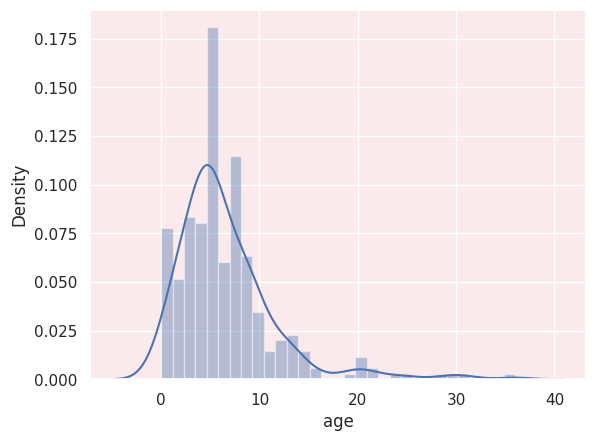

In [ ]:
sns.distplot(df["age"]);

In [ ]:
df["age_category"]=pd.cut(df.age,[-1,5,15,np.inf],labels=["new company","old company","older company"])

In [ ]:
df.sample()

,Company,City,Starting Year,Founders,Industries,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Industries_type 1,Industries_type 2,age,age_category
247,Testbook.com,Mumbai,2013,"Abhishek Sagar, Ashutosh Kumar, Manoj Munna, N...","E-Learning, EdTech, Education",101-250,12550000,5,10,E-Learning,EdTech,7,old company


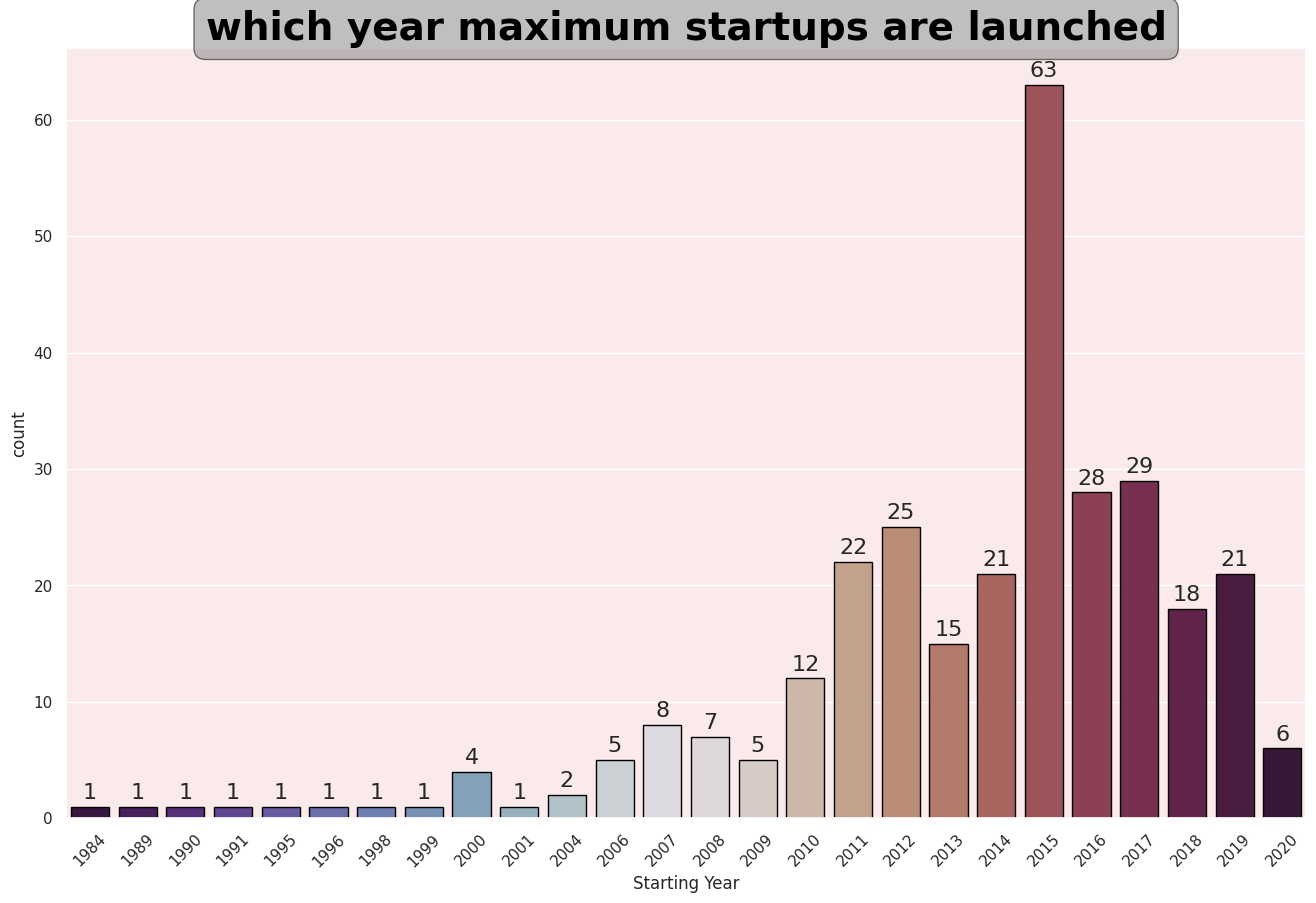

In [ ]:
plt.figure(figsize=(16,10))
ax=sns.countplot(x="Starting Year",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('which year maximum startups are launched', fontdict={'fontsize': 28, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.5,edgecolor='black'));

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=16,
                xytext = (0, 10),
                textcoords = 'offset points')

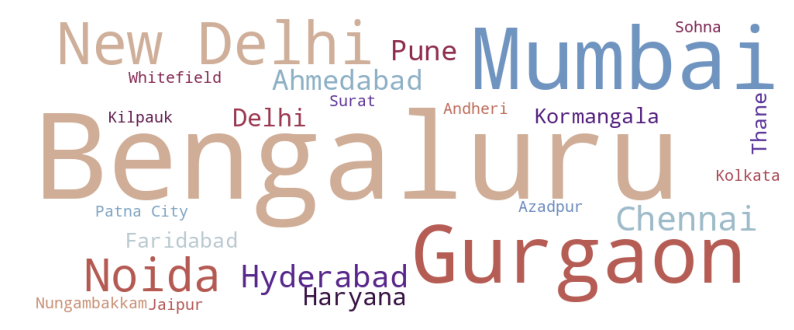

In [ ]:
from wordcloud import WordCloud as word
wc = word(background_color='white', width=1000, height=400,colormap="twilight_shifted")
wc.generate_from_frequencies(df["City"].value_counts())
plt.figure(figsize=(10,13),dpi=100)
plt.imshow(wc)
plt.axis('off')
plt.show()

Not Available             9
Vijay Shekhar Sharma      3
Amit Jain, Anurag Jain    2
Mukesh Ambani             2
Name: Founders, dtype: int64


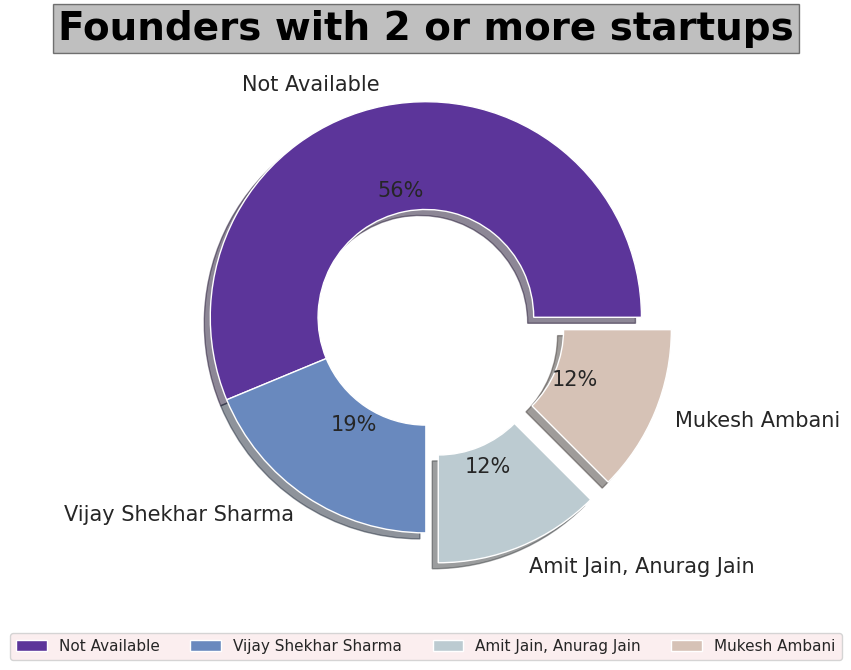

In [ ]:
x=df["Founders"].value_counts().sort_values(ascending=False).head(4)
print(x)
color=sns.color_palette("twilight_shifted")
plt.figure(figsize=(7,7))
plt.pie(x,labels=x.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={"width":0.5},shadow=True,colors=color,explode=[0,0,0.15,0.15])
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.15),ncol=4)
plt.title('Founders with 2 or more startups', fontdict={'fontsize': 28, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

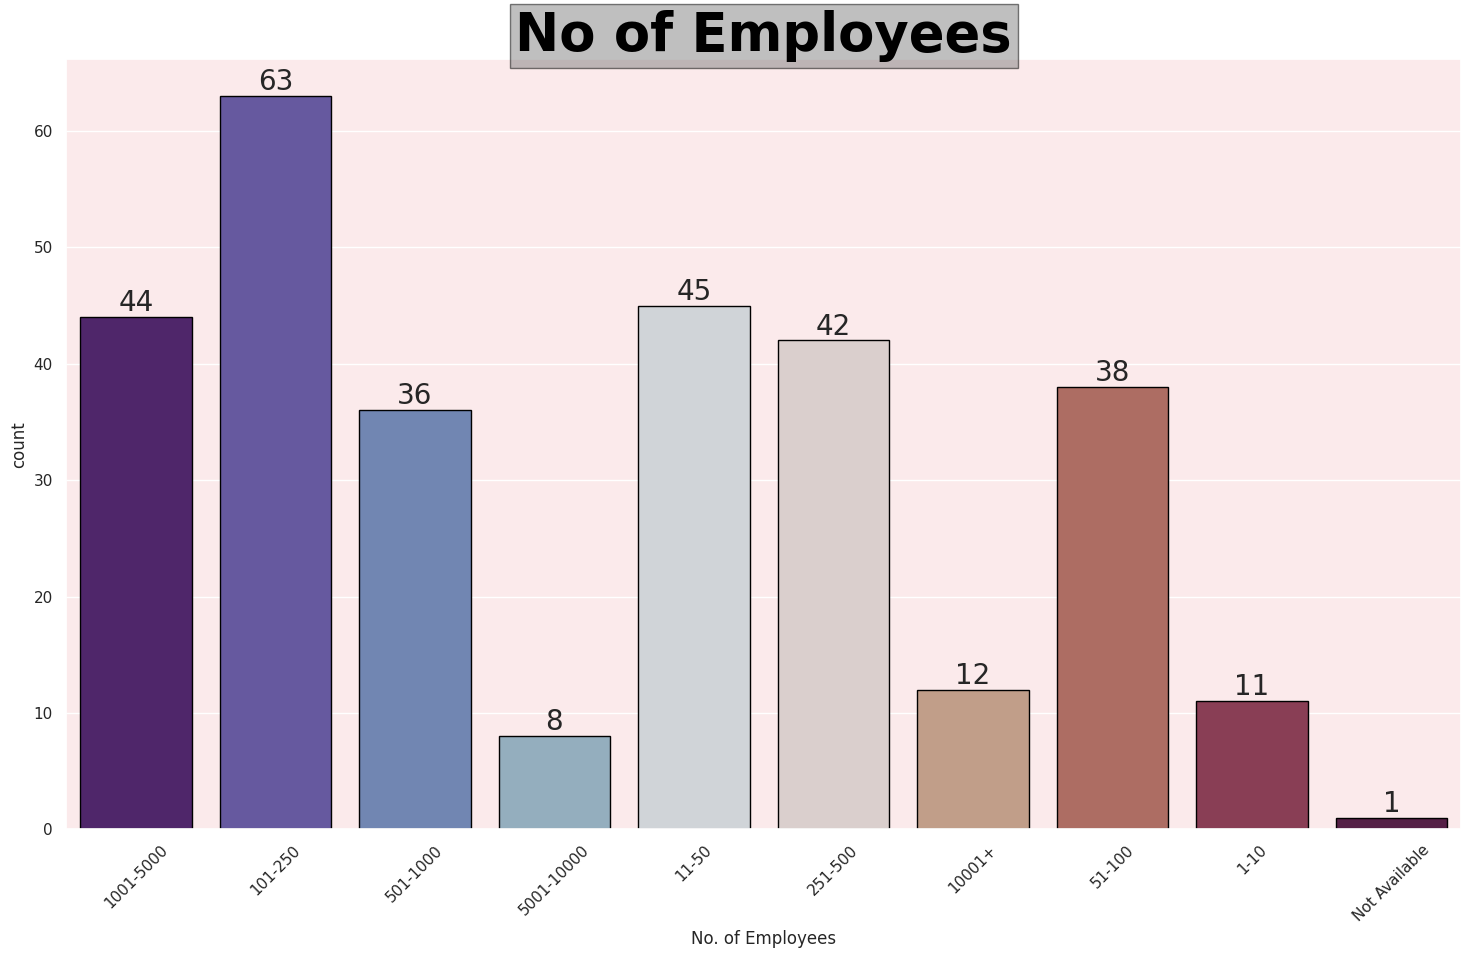

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x="No. of Employees",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('No of Employees', fontdict={'fontsize': 38, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')

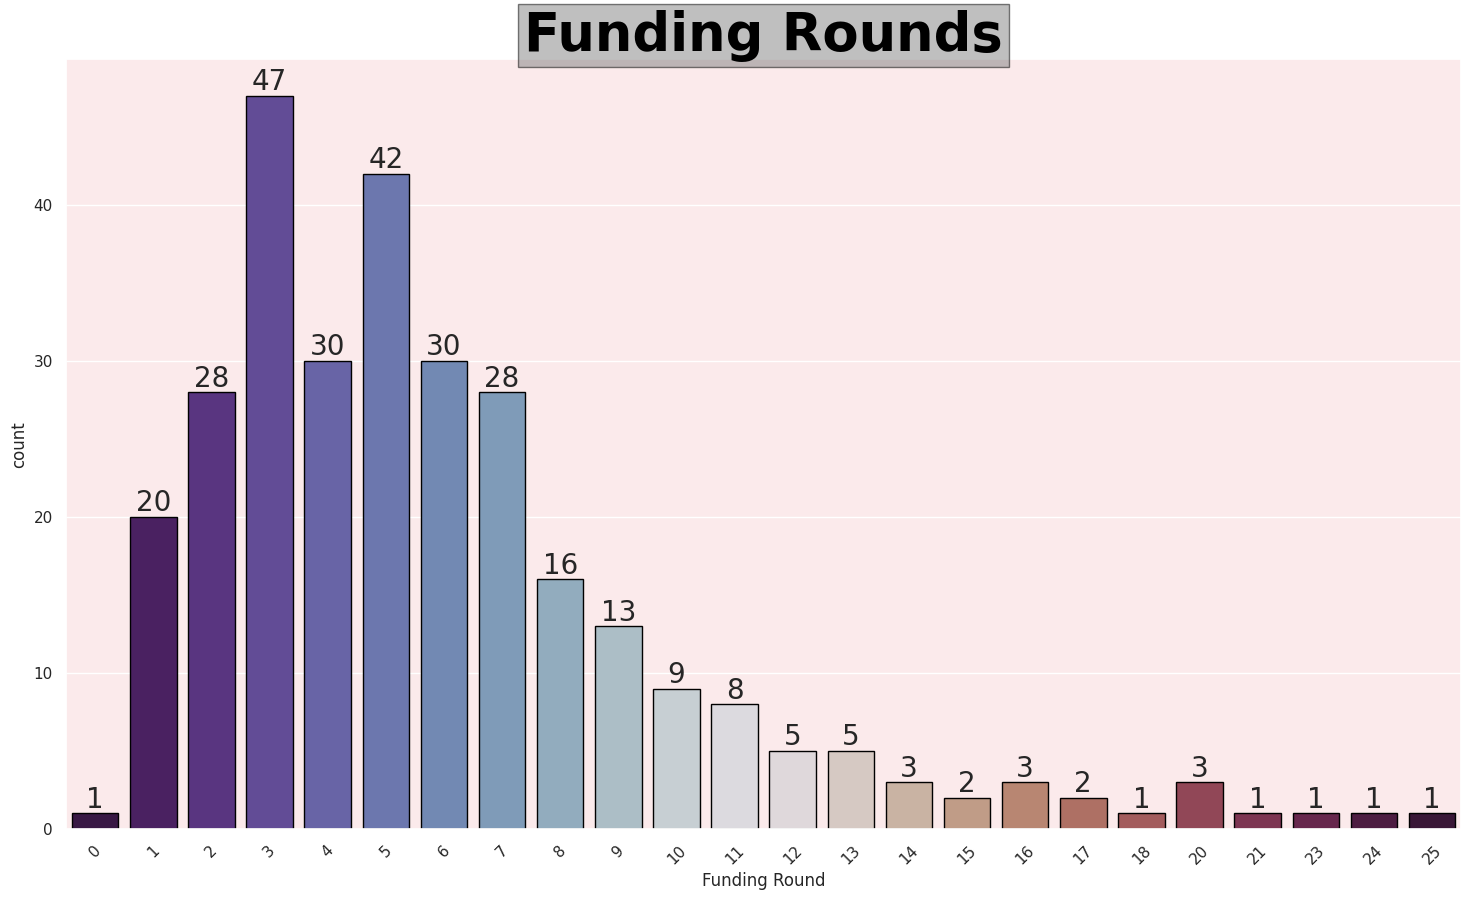

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x="Funding Round",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('Funding Rounds', fontdict={'fontsize': 38, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')

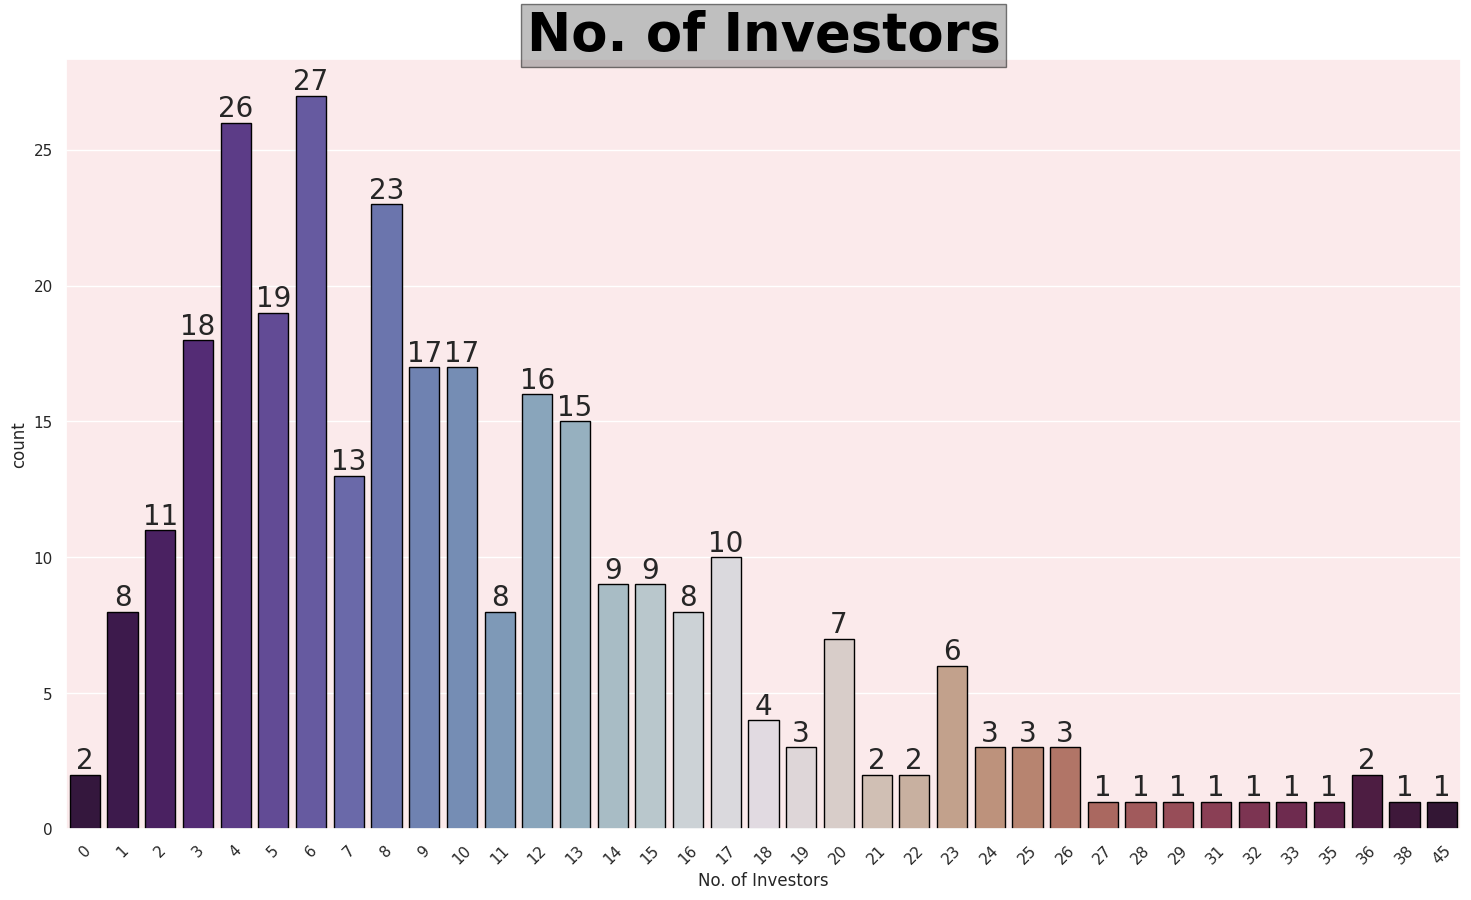

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x="No. of Investors",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('No. of Investors', fontdict={'fontsize': 38, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')

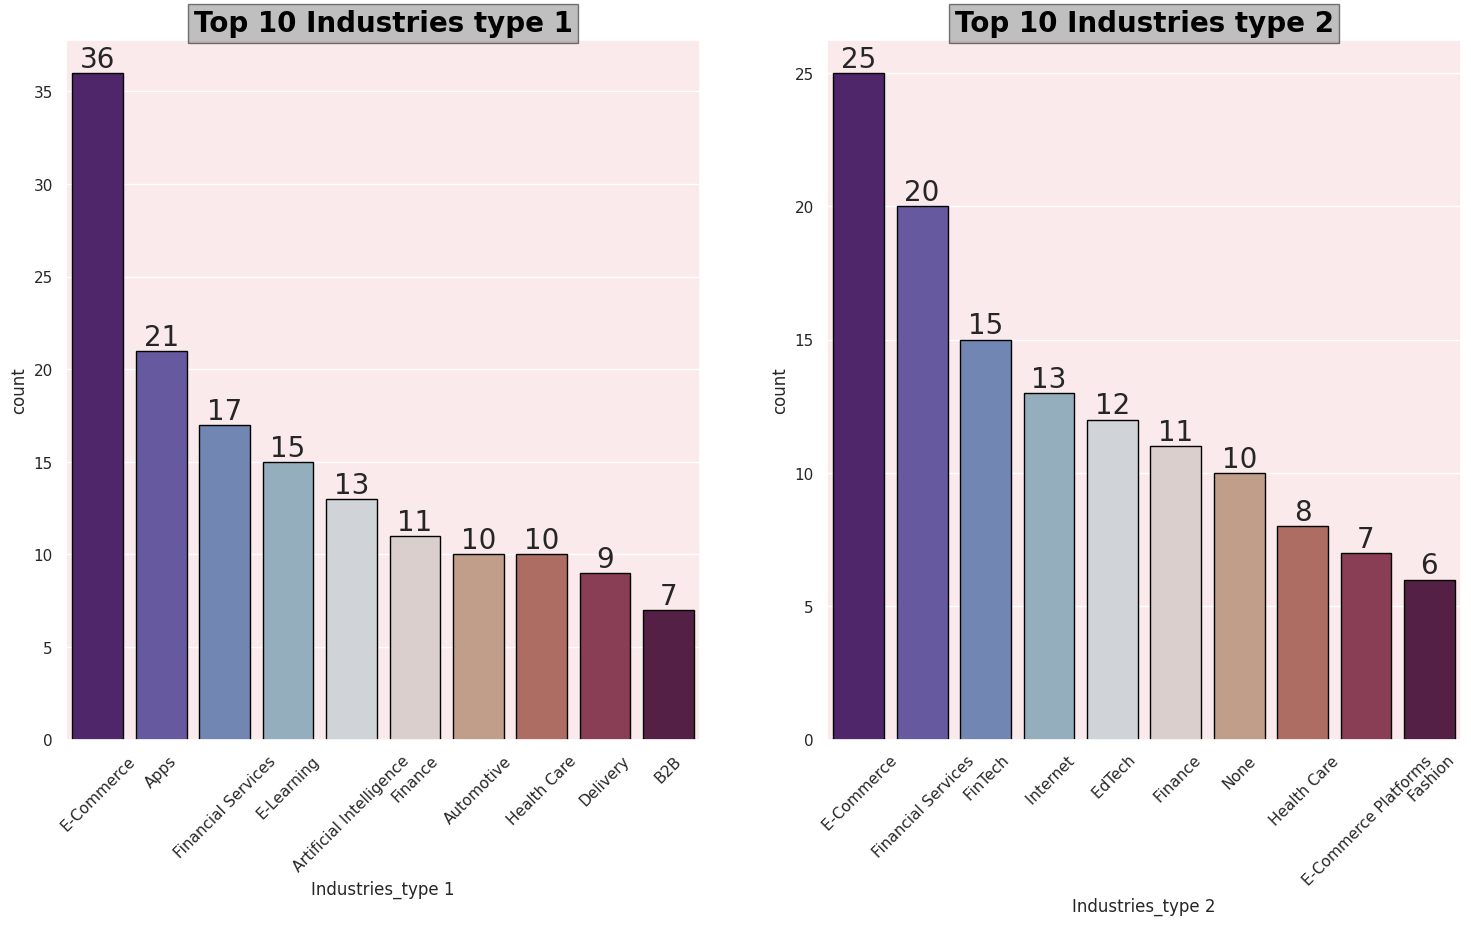

In [ ]:
b=df["Industries_type 1"].value_counts().head(10)
plt.figure(figsize=(18,20),dpi=100)
plt.subplot(2,2,1)
ax=sns.countplot(x="Industries_type 1",data=df,order=b.index,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('Top 10 Industries type 1', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')

plt.subplot(2,2,2)
c=df["Industries_type 2"].value_counts().head(10)
ay=sns.countplot(x="Industries_type 2",data=df,order=c.index,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('Top 10 Industries type 2', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for y in ay.patches:
    ay.annotate(format(y.get_height(), '.0f'),
                (y.get_x() + y.get_width() / 2., y.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')


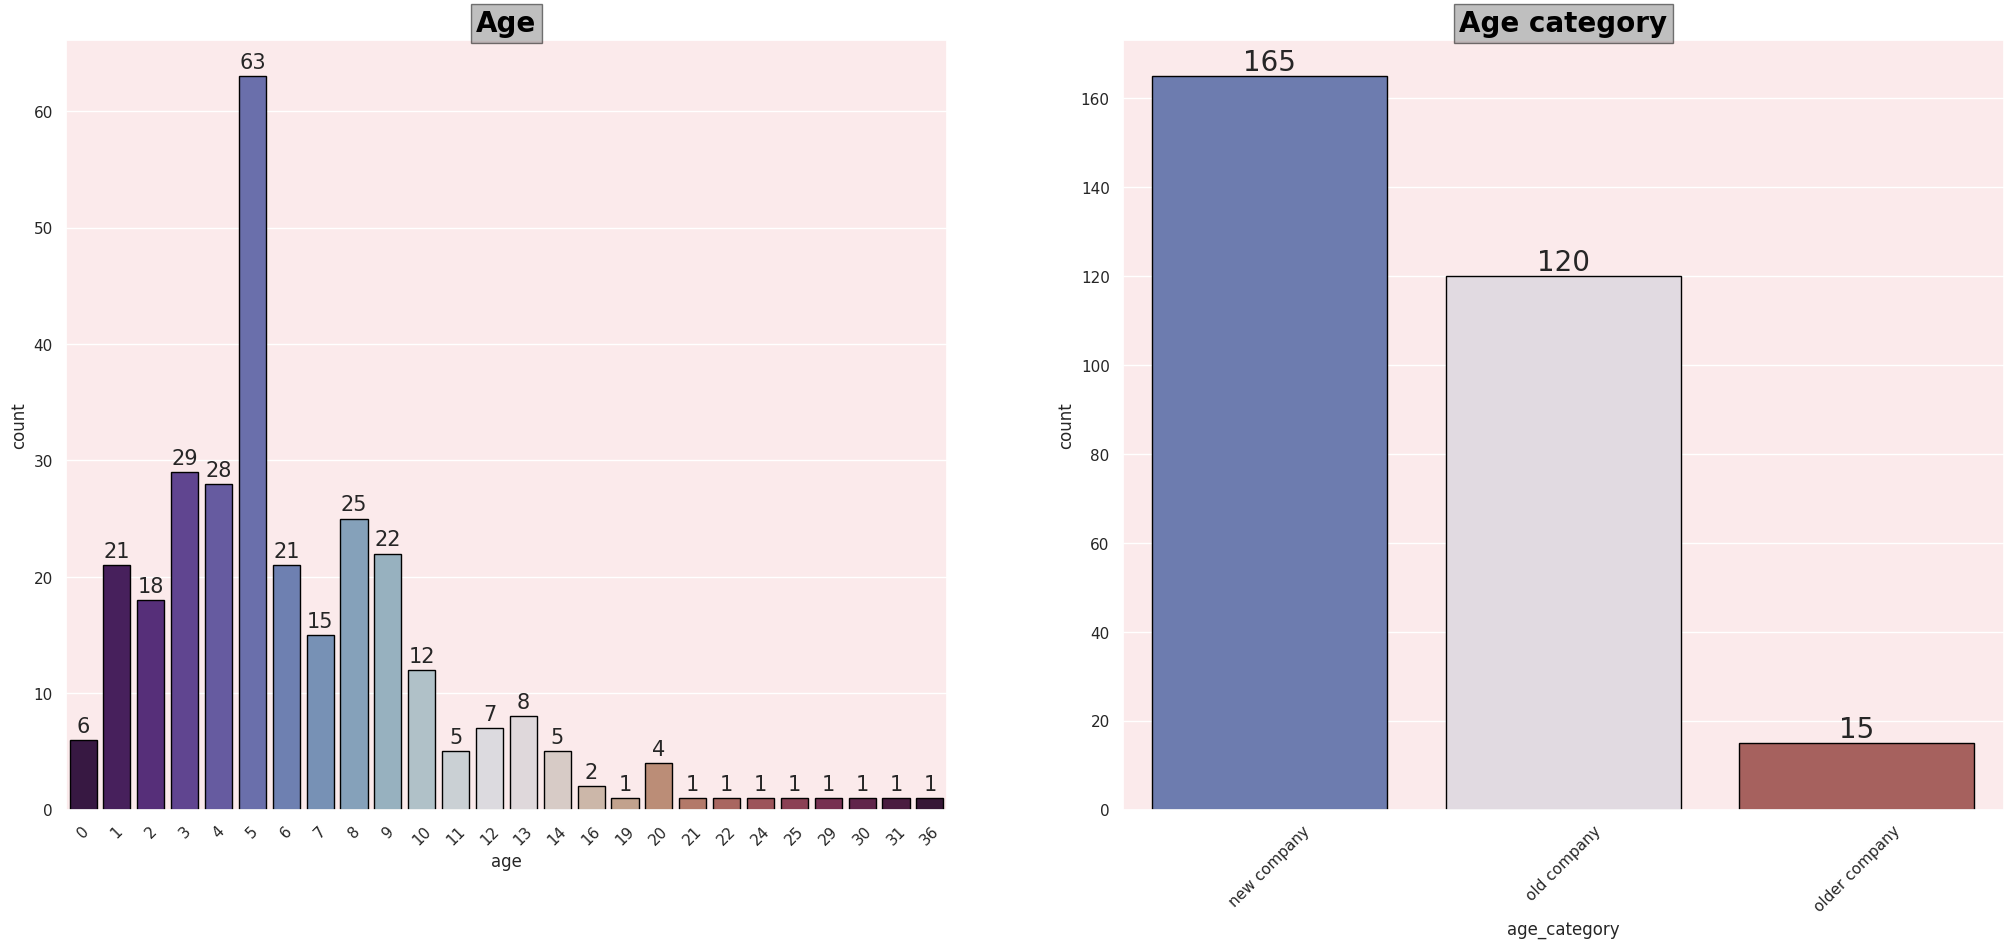

In [ ]:
plt.figure(figsize=(25,22),dpi=100)
plt.subplot(2,2,1)
ab= sns.countplot(x="age",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('Age', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for p in ab.patches:
    ab.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=15,
                xytext = (0, 10),
                textcoords = 'offset points')


plt.subplot(2,2,2)
ac=sns.countplot(x="age_category",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('Age category', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for j in ac.patches:
    ac.annotate(format(j.get_height(), '.0f'),
                (j.get_x() + j.get_width() / 2., j.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')


In [ ]:
df[df["Funding Amount in $"]==df["Funding Amount in $"].max()]

,Company,City,Starting Year,Founders,Industries,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Industries_type 1,Industries_type 2,age,age_category
32,Reliance Jio,Mumbai,2010,Mukesh Ambani,"Apps, Information Services, Internet, Telecomm...",10001+,24767620475,16,35,Apps,Information Services,10,old company


In [ ]:
df.groupby(["Starting Year","Company","City"])["Funding Amount in $"].max().sort_values(ascending=False).to_frame().head(10).style.background_gradient(cmap='twilight_shifted')

In [ ]:
df.groupby("City")["Funding Amount in $"].sum().sort_values(ascending=False).to_frame().style.background_gradient(cmap='twilight_shifted')

,Funding Amount in $
City,
Mumbai,36055016291
Bengaluru,26207212825
Gurgaon,15827429512
Noida,6134005051
Kormangala,3836092733
New Delhi,1888117254
Chennai,849120965
Pune,659265509
Faridabad,638829632


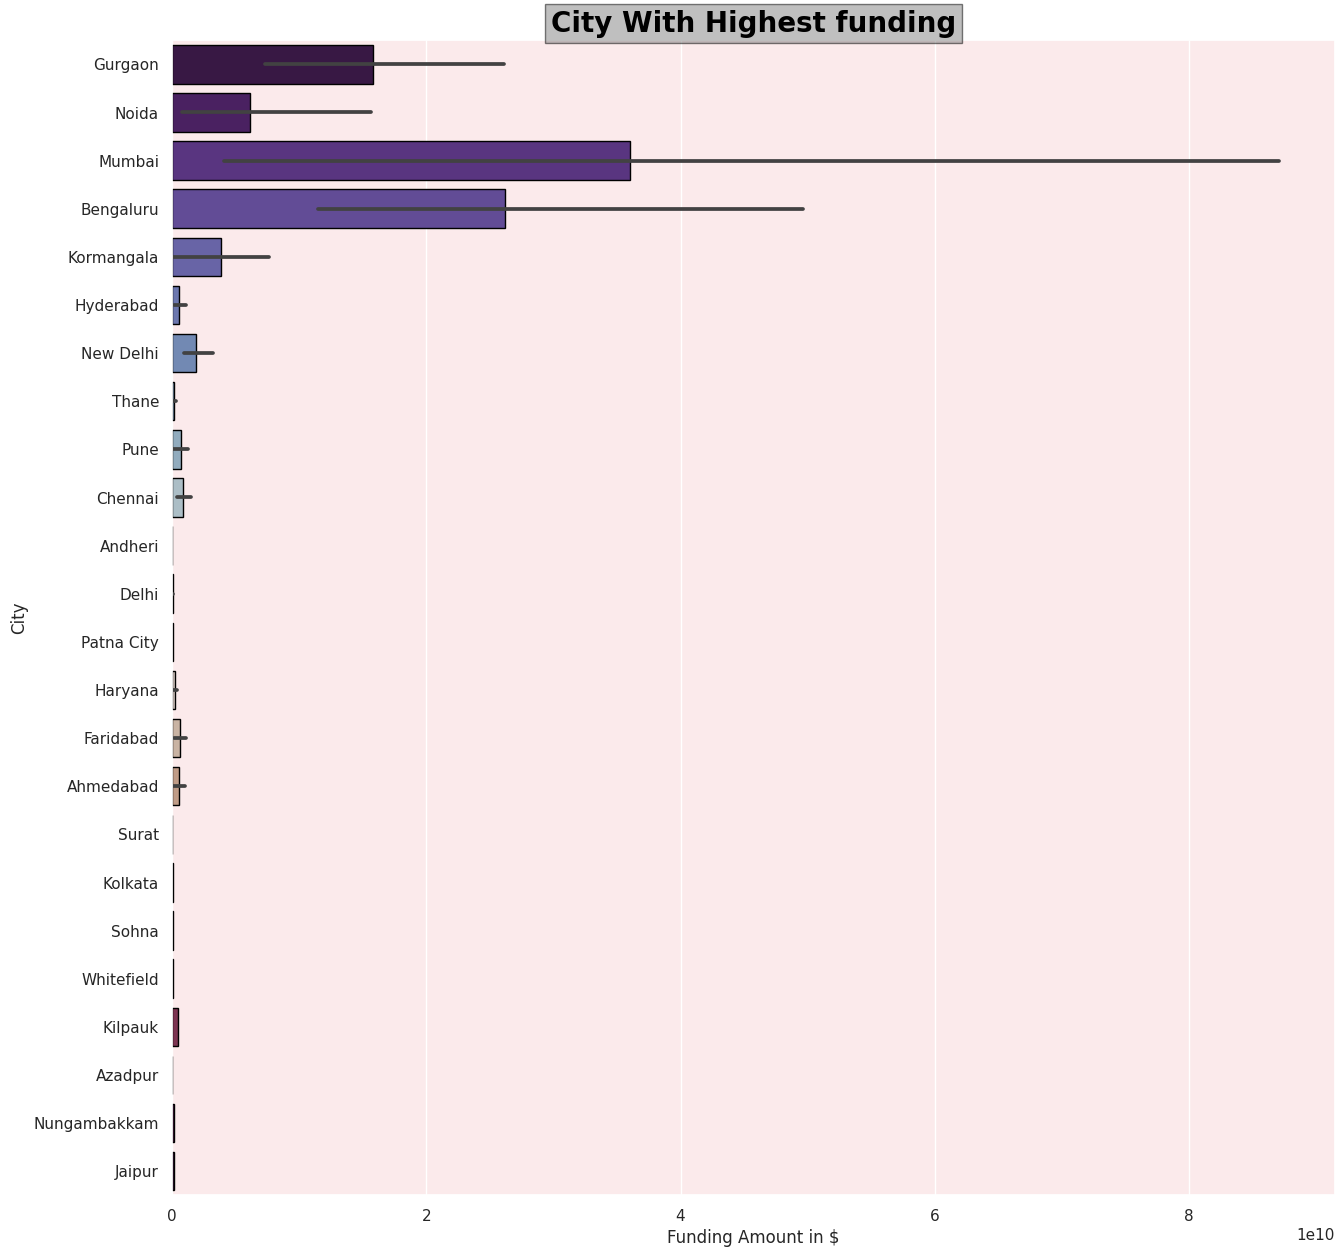

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(x="Funding Amount in $",y="City",edgecolor="black",estimator=sum,data=df,palette='twilight_shifted');
plt.title('City With Highest funding', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));


In [ ]:
df[df["No. of Employees"]=="10001+"][["Company","Funding Amount in $","City","Industries_type 1","No. of Investors"]].sort_values(by="Funding Amount in $",ascending=False).style.background_gradient(cmap='twilight_shifted')

,Company,Funding Amount in $,City,Industries_type 1,No. of Investors
32,Reliance Jio,24767620475,Mumbai,Apps,35
41,Flipkart,9009184737,Bengaluru,E-Commerce,24
37,Reliance Retail,6419310306,Mumbai,Consumer Goods,8
239,OYO,3439351106,Gurgaon,Hospitality,23
23,BYJU’S,2745964432,Bengaluru,E-Learning,38
143,Swiggy,2428380000,Bengaluru,Delivery Service,23
107,Zomato,2100568357,Gurgaon,Food Delivery,25
179,SBI Life,742000000,Mumbai,Financial Services,2
124,Ecom Express,485392829,New Delhi,Delivery,4
241,MedPlus,317695079,Hyderabad,E-Commerce,6


In [ ]:
df[df["age"]==df["age"].max()]

,Company,City,Starting Year,Founders,Industries,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Industries_type 1,Industries_type 2,age,age_category
186,Five Star Business Finance,Kilpauk,1984,V K Ranganathan,"Banking, Finance, Financial Services, Personal...",1001-5000,456059601,7,8,Banking,Finance,36,older company


In [ ]:
df[df["age"]>15][["Company","age","age_category"]].sort_values(by="age",ascending=False).style.background_gradient(cmap='twilight_shifted')

,Company,age,age_category
186,Five Star Business Finance,36,older company
99,MyMoneyMantra,31,older company
227,Amber Group,30,older company
286,Financial Software & Systems,29,older company
16,Dodla Dairy,25,older company
29,Bharat Biotech,24,older company
15,Pine Labs,22,older company
165,BookMyShow,21,older company
25,MediBuddy,20,older company
163,One97,20,older company


In [ ]:
df[["Funding Amount in $","No. of Investors","age"]].agg(["mean","min","max"]).style.background_gradient(cmap='twilight_shifted')

,Funding Amount in $,No. of Investors,age
mean,314865494.003333,10.550000,6.606667
min,0.000000,0.000000,0.000000
max,24767620475.000000,45.000000,36.000000


In [ ]:
df[df["Funding Amount in $"]== 0]

,Company,City,Starting Year,Founders,Industries,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Industries_type 1,Industries_type 2,age,age_category
285,WOW Skin Science India Ltd,Bengaluru,2016,Not Available,"Beauty, Consumer Goods, Cosmetics, Fashion",Not Available,0,0,0,Beauty,Consumer Goods,4,new company


In [ ]:
df[df["Funding Round"]>15][["Company","Starting Year","Funding Round","Funding Amount in $","Industries_type 1"]].sort_values(by="Funding Round",ascending=False).style.background_gradient(cmap="twilight_shifted")

,Company,Starting Year,Funding Round,Funding Amount in $,Industries_type 1
11,Ola,2010,25,3808672049,Apps
41,Flipkart,2007,24,9009184737,E-Commerce
113,Aye Finance,2014,23,261193454,Finance
107,Zomato,2008,21,2100568357,Food Delivery
50,ZoomCar,2012,20,274145634,Automotive
80,Rebel Foods,2011,20,342349901,E-Commerce
181,VerSe Innovation,2007,20,434009213,Content
23,BYJU’S,2011,18,2745964432,E-Learning
8,BigBasket,2011,17,1119863468,Delivery
239,OYO,2012,17,3439351106,Hospitality


In [ ]:
df[df["No. of Investors"]>25][["Company","Starting Year","No. of Investors","Industries_type 1"]].sort_values(by="No. of Investors",ascending=False).style.background_gradient(cmap="twilight_shifted")

,Company,Starting Year,No. of Investors,Industries_type 1
11,Ola,2010,45,Apps
23,BYJU’S,2011,38,E-Learning
10,Unacademy,2015,36,E-Learning
50,ZoomCar,2012,36,Automotive
32,Reliance Jio,2010,35,Apps
69,cure.fit,2016,33,Apps
31,Rapido,2015,32,Information Services
88,Trell,2016,31,Lifestyle
4,Razorpay,2014,29,Financial Services
13,CRED,2018,28,Credit Cards


In [ ]:
df.to_csv("startups.csv")